## 3D Raw SIM Images volumetric pre-processing for Deep-learning


<br>
<br>

This notebook onverts 3D SIM stack images into cropped volummteric patchs. <br>
The intent of cropping is to fit data in to the memory of a training GPU. <br>
This code was written for python 3 on NVIDIA TITAN RTX, and hasn't been tested on other env's <br>

## Getting Started
---- 
authored by: bereket kebede, October 2022

In [1]:
########################################
# Setting environment

import sys
sys.path.append("C:/Users/CIRL/AppData/Local\Programs/Python/Python39/Lib/site-packages")
sys.path.append("C:/Users/CIRL/AppData/Local\Programs/Python/Python36/Lib/site-packages")

In [2]:
########################################
# Import necessary libraries

from PIL import Image
import numpy as np
import numpy
import matplotlib.pyplot as plt
import os
import scipy.ndimage
from skimage import io
from tifffile import imsave

## Import 3D SIM Stack data
----
import RAW SIM and 3D SIM reconstructed data

In [3]:
########################################
# Load data into the phyton notebook

rawSIM_image_link = "D:/Bereket/Research/Crawling 3D SIM Data/3D SIM Mitochondria and Lysosomes/LiveCell/eGFP/RawSIM/20210420_H9C2-dTag_GLU_37C_1520_sim-fast_007.tif"
ground_truth_image_link = "D:/Bereket/Research/Crawling 3D SIM Data/3D SIM Mitochondria and Lysosomes/LiveCell/eGFP/3DSIM/20210420_H9C2-dTag_GLU_37C_1520_sim-fast_007_SIR.tif"

In [4]:
RS_image = io.imread(rawSIM_image_link) # Wide-field image
GT_image = io.imread(ground_truth_image_link) # Wide-field image

print('RawSIM_image size is: ', RS_image.shape)
print('Ground-truth_image size is: ', GT_image.shape)

RawSIM_image size is:  (40, 255, 512, 512)
Ground-truth_image size is:  (40, 17, 1024, 1024)


Data Format <br>

data type 1: (stack, x, y) <br>
data type 2: (time, stack, x, y) <br>
data type 3: (stack, channel, x, y) <br>


Acquisition format <br>

type 1: change all phase -> change all depth -> change all orientation  <br>

In [5]:
data_format = "type_2"
RS_image.ndim

4

In [26]:
RS_image.shape[RS_image.ndim - 3]

255

Min value: 94.26666666666667
Max value: 1312.9333333333334
Min value: 0.0
Max value: 1.0


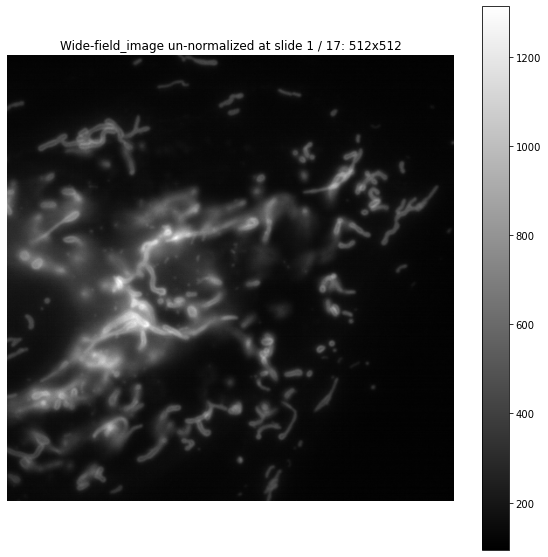

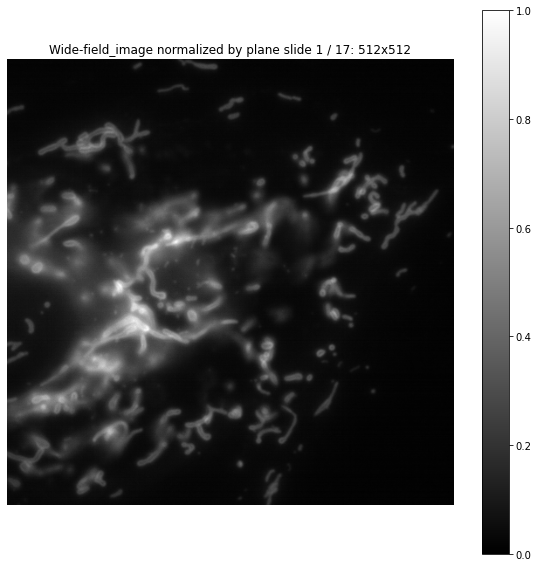

In [29]:
########################################
# wide-field

x_dimension = RS_image.ndim - 2
y_dimension = RS_image.ndim - 1

wf_sum = np.zeros([RS_image.shape[x_dimension], RS_image.shape[y_dimension]])

orient = 3
phase = 5
slide = 1

#depth = GT_image[slide-1]
rawsim = orient*phase

if (data_format == "type_3"):
    total_rawsim = RS_image.shape[RS_image.ndim - 4]
if (data_format == "type_1"):
    total_rawsim = RS_image.shape[RS_image.ndim - 3]
else:
    total_rawsim = RS_image.shape[RS_image.ndim - 3]


offset = 5*slide
jump = total_rawsim//3

for i in range(orient):
    for j in range(phase):
        hollow = i*(total_rawsim//orient)+j
        if (data_format == "type_2"):
            wf_sum += RS_image[0,hollow+offset]  # time dimension at 0
        elif (data_format == "type_3"):
             wf_sum += RS_image[hollow+offset,0]  # channel dimension at 0
        else:
             wf_sum += RS_image[hollow+offset]  # time dimension at 0
             print((hollow+offset))

wf = wf_sum/15
wf_normalized_by_plane = (wf - np.min(wf))/np.max(wf - np.min(wf))


g = plt.figure(figsize=(10,10))

plt.imshow( wf, cmap='gray')
plt.title('Wide-field_image un-normalized at slide %d / %d: %dx%d' %(slide, total_rawsim//15, RS_image.shape[x_dimension], RS_image.shape[y_dimension]) )
plt.colorbar()
plt.axis('off')
#plt.grid(b=None)

b = plt.figure(figsize=(10,10))
plt.imshow(wf_normalized_by_plane, cmap='gray')
plt.title('Wide-field_image normalized by plane slide %d / %d: %dx%d' %(slide, total_rawsim//15, RS_image.shape[x_dimension], RS_image.shape[y_dimension]) )
plt.colorbar()
plt.axis('off')

print( 'Min value:' , np.min(wf) )
print( 'Max value:' , np.max(wf) )

print( 'Min value:' , np.min(wf_normalized_by_plane) )
print( 'Max value:' , np.max(wf_normalized_by_plane) )

In [30]:
total_rawsim

255

In [31]:
RS_image.shape

(40, 255, 512, 512)

In [32]:
GT_image.shape

(40, 17, 1024, 1024)

Min value: 0.0
Max value: 1.0


(-0.5, 1023.5, 1023.5, -0.5)

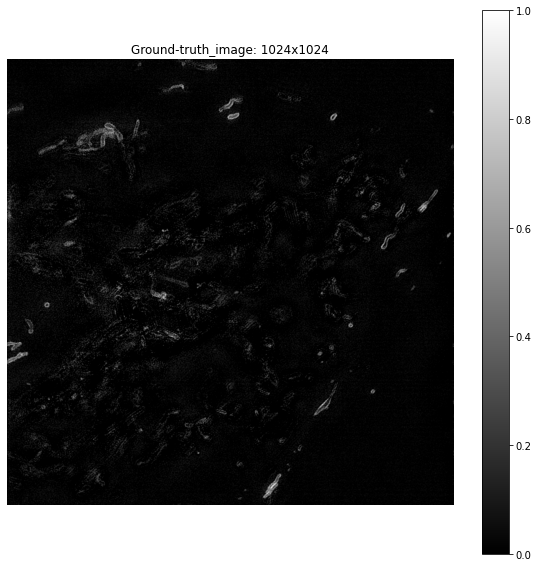

In [33]:
g = plt.figure(figsize=(10,10))

if data_format == "type_2":
    GT_ver_1 = GT_image[0,slide-1,:,:]
elif data_format == "type_3":
    GT_ver_1 = GT_image[slide-1,0,:,:] # at channel 0
else:
    GT_ver_1 = GT_image[slide-1,:,:]
    
new_min = np.min(GT_ver_1) 
new_max = np.max(GT_ver_1)

GT_ver_2 = GT_ver_1.copy()
GT_ver_2[GT_ver_2<0] = 0    #thresholding
GT_ver_3 = GT_ver_2/np.max(GT_ver_2)


print( 'Min value:' , np.min(GT_ver_3) )
print( 'Max value:' , np.max(GT_ver_3) )
plt.imshow(GT_ver_3, cmap='gray')
plt.title('Ground-truth_image: %dx%d' %(GT_image.shape[GT_image.ndim-2], GT_image.shape[GT_image.ndim-1]) )
plt.colorbar()
plt.axis('off')

## Normalizing 3D Ground Truth Stack


GT_image.shape = (20, 17, 2048, 2048) <br>
new_GT.shape = (17, 2048, 2048) <br>

In [34]:
GT_image.shape

(40, 17, 1024, 1024)

Min value of 3D stack point cloud: 0.0
Min value of 3D stack point cloud:: 1.0


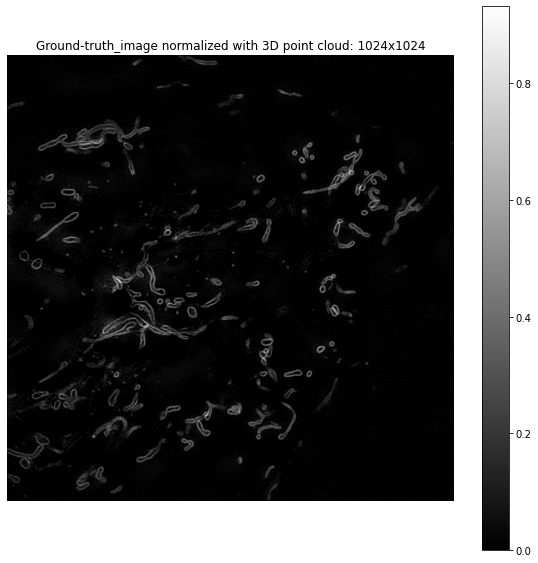

In [35]:
#temp_GT = np.empty_like(GT_image[0,:,:,:])

if (data_format == "type_2"):
    temp_GT = GT_image[slide-1].copy()
    temp_GT[temp_GT<0] = 0    #thresholding
    temp_GT = temp_GT/np.max(temp_GT)
elif (data_format == "type_3"):
    temp_GT = GT_image[:,0,:,:].copy() # at channel 0
    temp_GT[temp_GT<0] = 0    #thresholding
    temp_GT = temp_GT/np.max(temp_GT)
else:
    temp_GT = GT_image.copy()
    temp_GT[temp_GT<0] = 0    #thresholding
    temp_GT = temp_GT/np.max(temp_GT)

    
# copy -> threshold -> Normalize
g = plt.figure(figsize=(10,10))
#plt.imshow(temp_GT[10],cmap='gray', extent=[0, 1, 0, 1])
if data_format == "type_2":
    plt.imshow(temp_GT[3],cmap='gray')
else:
    plt.imshow(temp_GT[slide-1],cmap='gray')
    
plt.title('Ground-truth_image normalized with 3D point cloud: %dx%d' %(GT_image.shape[GT_image.ndim-2], GT_image.shape[GT_image.ndim-1]) )
plt.colorbar()
plt.axis('off')

print( 'Min value of 3D stack point cloud:' , np.min(temp_GT) )
print( 'Min value of 3D stack point cloud::' , np.max(temp_GT) )

In [36]:
temp_GT.shape

(17, 1024, 1024)

In [37]:
RS_image.shape

(40, 255, 512, 512)

In [38]:
images_per_plane = 15 
real_depth = total_rawsim//images_per_plane
data = np.zeros((1, images_per_plane, real_depth, RS_image.shape[RS_image.ndim-2], RS_image.shape[RS_image.ndim-1]))

print(data.shape)

for k in range(real_depth):
    for i in range(orient):
        for j in range(phase):
            if (data_format == "type_3"):
                data[0,i*j,k,:,:] = RS_image[i+j,0]
            else:
                data[0,i*j,k,:,:] = RS_image[0,i+j]

            
# expected output:(1, 15, 17, 1024, 1024)

(1, 15, 17, 512, 512)


In [39]:
RS_image.shape

(40, 255, 512, 512)

In [40]:
os.getcwd()

'D:\\Bereket\\DeepLearning - 3D\\Workspace\\Data_3D_10'

In [41]:
images_per_plane = 15 
depth = total_rawsim//images_per_plane
data = np.zeros((1, images_per_plane, depth, RS_image.shape[RS_image.ndim-2], RS_image.shape[RS_image.ndim-1]))
block = total_rawsim//3
        
print(data.shape)

for k in range(depth):
    #print('Depth %d'%(k+1))
    #print('---------------------------')
    for i in range(orient):
        for j in range(phase):
            #print(k*phase+j+i*block)
            if (data_format == "type_3"):
                data[0,phase*i+j,k,:,:] = RS_image[orient*k+j+i*block,0]
            elif (data_format == "type_1"):
                data[0,phase*i+j,k,:,:] = RS_image[orient*k+j+i*block]
            else:
                data[0,phase*i+j,k,:,:] = RS_image[0,orient*k+j+i*block]

(1, 15, 17, 512, 512)


(-0.5, 511.5, 511.5, -0.5)

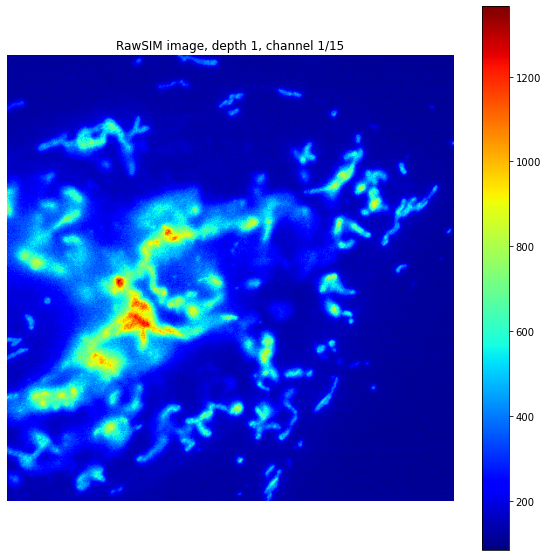

In [42]:
temp = data[0,0,0,:,:]
g = plt.figure(figsize=(10,10))
plt.imshow(temp, cmap ='jet')
plt.title('RawSIM image, depth 1, channel 1/15')
plt.colorbar()
plt.axis('off')

In [43]:
temp_GT.shape

(17, 1024, 1024)

In [44]:
data.shape

(1, 15, 17, 512, 512)

## Normalizing 3D Raw SIM

In [45]:
clipped_data = data.copy()
clipped_data = clipped_data - np.min(data)

In [46]:
np.max(data)

2011.0

In [47]:
clipped_data = data.copy() # at channel 0
clipped_data[clipped_data<0] = 0    #thresholding

apodized_data = clipped_data - np.min(data)
norm_3D_data = apodized_data/np.max(apodized_data)

(-0.5, 1023.5, 1023.5, -0.5)

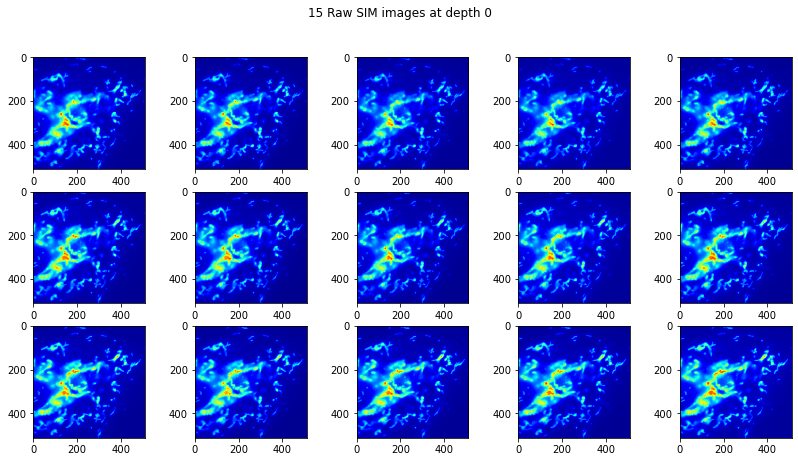

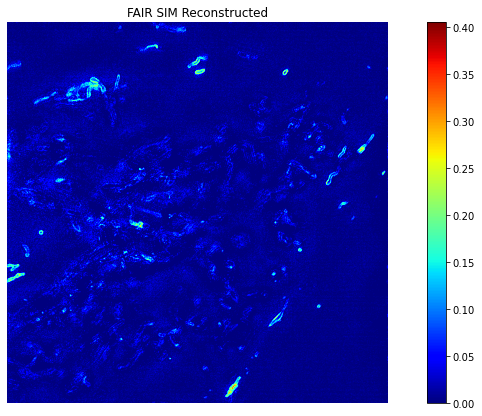

In [48]:
f = plt.figure(figsize=(14, 7))

depth = 0
plt.suptitle('15 Raw SIM images at depth %d' %depth)
for i in range(15):
    f.add_subplot(3, 5, i+1)
    plt.imshow(norm_3D_data[0,i,depth,:,:], cmap ='jet')
    
g =plt.figure(figsize=(14, 7))
plt.imshow(temp_GT[depth,:,:], cmap='jet')
plt.title('FAIR SIM Reconstructed')
plt.colorbar()
plt.axis('off')

Text(0.5, 1.0, 'x-z plane GT at y = 100')

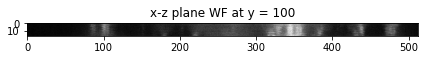

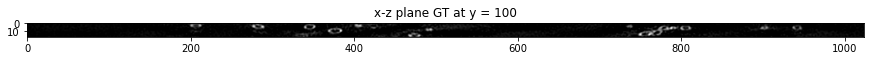

In [49]:
f = plt.figure(figsize=(7,10))

# f.add_subplot(3,5,1)
# plt.imshow(data[0,1,0,:,:])

plt.imshow(norm_3D_data[0,0,:,:,99], cmap='gray')
plt.title('x-z plane WF at y = 100')

g = plt.figure(figsize=(15,20))
plt.imshow(temp_GT[:,:,99], cmap='gray')
plt.title('x-z plane GT at y = 100')

Text(0.5, 1.0, 'x-z plane GT at y = 100')

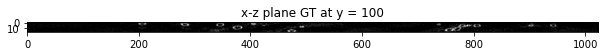

In [53]:
##########################################
# up-sample in the z-dimension 

up_sample_GT_bool = 'false'

if (up_sample_GT_bool == 'true'):
    up_sampled_GT_image = np.repeat(temp_GT,2, axis=0)
else:
    up_sampled_GT_image = temp_GT.copy()
    
g = plt.figure(figsize=(10.24,1.1))
plt.imshow(up_sampled_GT_image[:,:,99], cmap='gray')
plt.title('x-z plane GT at y = 100')

## Cropping or Padding Input 3D Stack to 32x32x32 patchs and upsampling to 64x64x64
----

eg. 512x512x55 to 32x32x32 and upsampling to 64x64x64


## Zero padding to fill remaining Stack depth array to 32

Zero padding ground truth

In [40]:
up_sampled_GT_image.shape

(106, 1024, 1024)

In [54]:
# Zero padding for ground truth

wanted_z_dim = 64
padding_bool = 'no'

if (padding_bool == 'yes'):
    if (up_sampled_GT_image.shape[0] >= wanted_z_dim):
        newer_GT = up_sampled_GT_image[0:wanted_z_dim,:,:]
        print(newer_GT.shape)
    else:
        newer_GT = up_sampled_GT_image.copy()
        newer_GT.resize((wanted_z_dim,up_sampled_GT_image.shape[1], up_sampled_GT_image.shape[2]))
        newer_GT.shape
else:
    newer_GT = up_sampled_GT_image.copy()
    print(newer_GT.shape)

(17, 1024, 1024)


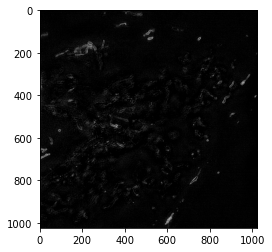

In [58]:
plt.imshow(newer_GT[0,:,:], cmap ='gray')

## Visualize patchs

(-0.5, 62.5, 62.5, -0.5)

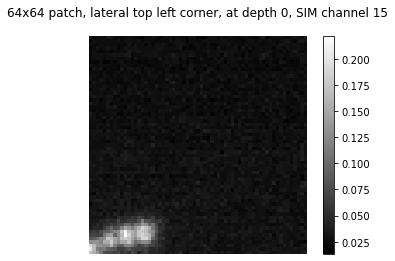

In [62]:
sim_channel =15

wanted_x_in = 64 # for CaGAN, input is size 64x64xdepth
wanted_y_in = 64

plt.imshow(norm_3D_data[0,sim_channel-1,0,0:wanted_y_in-1,0:wanted_x_in-1], cmap ='gray')
plt.title('%dx%d patch, lateral top left corner, at depth 0, SIM channel %d' %(wanted_x_in,wanted_y_in,sim_channel), pad=20);
plt.colorbar()
plt.axis('off')

## Zero padding the raw SIM



In [63]:
# Zero padding for TTV data
new_data = norm_3D_data.copy()
print(new_data.shape)
#new_data.resize((1,15,32,1024,1024))

(1, 15, 17, 512, 512)


In [64]:

padding_bool == 'no'

if (padding_bool == 'yes'):
    if (up_sampled_GT_image.shape[0] >= wanted_z_dim):
        new_data = data[:,:,0:wanted_z_dim//2,:,:]
        print(new_data.shape)
    else:
        v = np.zeros([1,15,32-17,new_data.shape[3],new_data.shape[4]])
        v.shape
        new_data = np.concatenate((data, v), axis=2)
        new_data.shape
else:
    pass

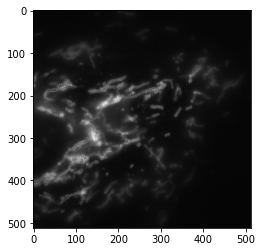

In [66]:
plt.imshow(new_data[0,10,16,:,:], cmap = 'gray')

In [80]:
new_data.shape

(1, 15, 17, 512, 512)

In [68]:
total_depth = 17

wide_field_sum = np.zeros([total_depth,RS_image.shape[x_dimension], RS_image.shape[y_dimension]])

for j in range(total_depth):
    for i in range(images_per_plane):
        wide_field_sum[j] += new_data[0,i,j]

In [73]:
path = 'E:/Bereket/Research/DeepLearning - 3D/Data/Data_pre_processed/MDV/for_caGAN'
wf_name = '/20210420_H9C2-dTag_GLU_37C_1520_sim-fast_007'
my_path = path + wf_name +'/Wide-field'

if(os.path.isdir(my_path) == False):
    os.makedirs(my_path)
imsave(my_path+'/20210420_H9C2-dTag_GLU_37C_1520_sim-fast_007.tif',wide_field_sum)

In [74]:
#####################################################################################
# Allow Memory Growth

import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

## pre-process training data

crop patch TTV data and send it to pattern illuminated folder

In [83]:
# pre-process training data

path = 'E:/Bereket/Research/DeepLearning - 3D/Data/Data_pre_processed/MDV/for_caGAN'
raw_SIM_name = '/20210420_H9C2-dTag_GLU_37C_1520_sim-fast_007'
my_path = path + raw_SIM_name +'/Pattern_illuminated'

f= plt.figure(figsize=(14, 14))
count = 0
c = []

wanted_x_in = 64
wanted_y_in = 64
up_sample_bool = 'false'

for x in range(0,data.shape[3],wanted_x_in):
    for y in range(0,data.shape[4],wanted_y_in):
        count +=1
        c = []
        for i in range(15):
            c.append(new_data[0,i,:,x:x+wanted_x_in,y:y+wanted_x_in])
            #image = scipy.ndimage.zoom(c[i], zoom = (2,2,2), order = 1)
            if (up_sample_bool == 'true'):
                up_x = np.repeat(c[i],2, axis=0)
                up_y = np.repeat(up_x,2, axis=1)
                up_z = np.repeat(up_y,2, axis=2)
            else:
                up_z = c[i]
            if(os.path.isdir(my_path+'/Sample_%d'%(count)) == False):     
                os.makedirs(my_path+'/Sample_%d/'%(count))
            imsave(my_path+'/Sample_%d/HE_%d.tif' %(count,i+1), up_z)

<Figure size 1008x1008 with 0 Axes>

## pre-process ground truth

crop patch ground truth data and send it to reconstructed folder

In [77]:
# pre-process ground truth

# fix ground truth of 007

path = 'E:/Bereket/Research/DeepLearning - 3D/Data/Data_pre_processed/MDV/for_caGAN'
GT_name =  '/20210420_H9C2-dTag_GLU_37C_1520_sim-fast_007'
my_path = path + GT_name +'/Reconstructed'

wanted_x_out = 128
wanted_y_out = 128

gt_list = []
count = 0
for x in range(0,newer_GT.shape[1],wanted_x_out):
    for y in range(0,newer_GT.shape[2],wanted_x_out):
        gt_list.append(newer_GT[:,x:x+wanted_x_out,y:y+wanted_x_out])
        count +=1
        if(os.path.isdir(my_path) == False):
                os.mkdir(my_path)
        imsave(my_path+'/Sample_%d.tif' %(count), gt_list[count-1])

In [78]:
newer_GT.shape

(17, 1024, 1024)

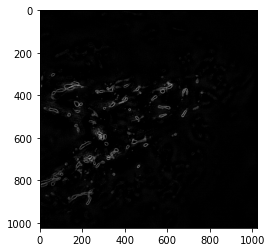

In [79]:
plt.imshow(newer_GT[10], cmap = 'gray')